In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, vmap
from time import time

import math, os, sys
# torch.manual_seed(0)

In [2]:
# dimension
D = 20

# domain width
L = 1.0

# rhs

om = 2.

c = -1.


def f(x):
    return (-om ** 2 + c) * (om * x).cos().sum()


# boundary condition
def g(x):
    return (om * x).cos().sum()


def u_true(x):
    return (om * x).cos().sum()

In [3]:
u1 = nn.Sequential(nn.Linear(D, 64),
                  nn.Tanh(), # nn.GELU(approximate="tanh"),
                  nn.Linear(64, 32),
                  nn.GELU(approximate="tanh"),
                  nn.Linear(32, 1))

u3 = nn.Sequential(nn.Linear(D, 64),
                  nn.Tanh(), # nn.GELU(approximate="tanh"),
                  nn.Linear(64, 32),
                  nn.GELU(approximate="tanh"),
                  nn.Linear(32, 1))

u7 = nn.Sequential(nn.Linear(D, 64),
                  nn.Tanh(), # nn.GELU(approximate="tanh"),
                  nn.Linear(64, 32),
                  nn.GELU(approximate="tanh"),
                  nn.Linear(32, 1))

u137 = nn.Sequential(nn.Linear(D, 64),
                  nn.Tanh(), # nn.GELU(approximate="tanh"),
                  nn.Linear(64, 32),
                  nn.GELU(approximate="tanh"),
                  nn.Linear(32, 1))

In [4]:
u1.load_state_dict(torch.load("the_network_01.pt"))
u3.load_state_dict(torch.load("the_network_03.pt"))
u7.load_state_dict(torch.load("the_network_07.pt"))
u137.load_state_dict(torch.load("the_network.pt"))

<All keys matched successfully>

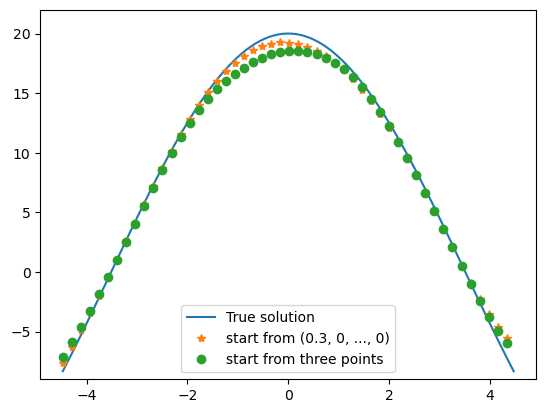

In [5]:
x_test = torch.linspace(-L, L, 200).unsqueeze(dim=1) * torch.ones(D)
plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200), vmap(u_true)(x_test).detach().numpy())
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], u1(x_test).squeeze().detach().numpy()[::4], "--")
plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], u3(x_test).squeeze().detach().numpy()[::4], "*")
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], u7(x_test).squeeze().detach().numpy()[::4], "s")
plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], u137(x_test).squeeze().detach().numpy()[::4], "o")
plt.ylim(-9, 22)
plt.legend(["True solution", "start from (0.1, 0, ..., 0)", "start from (0.3, 0, ..., 0)", 
           "start from (0.7, 0, ..., 0)", "start from three points"])
plt.legend(["True solution", "start from (0.3, 0, ..., 0)", "start from three points"])
# plt.savefig("20d_diag.png")
plt.show()

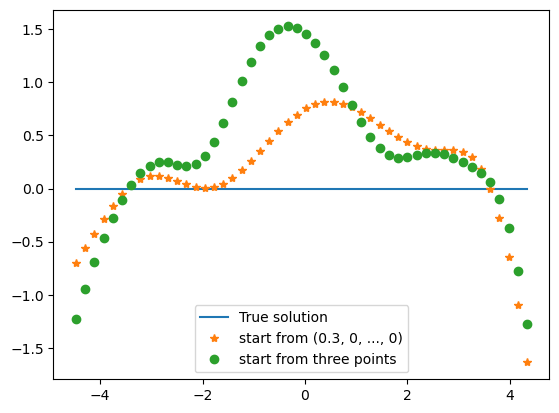

In [6]:
x_test = torch.linspace(-L, L, 200).unsqueeze(dim=1) * torch.ones(D)
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200), vmap(u_true)(x_test).detach().numpy())
plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - vmap(u_true)(x_test)).detach().numpy()[::4])
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - u1(x_test).squeeze()).detach().numpy()[::4], "--")
plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - u3(x_test).squeeze()).detach().numpy()[::4], "*")
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - u7(x_test).squeeze()).detach().numpy()[::4], "s")
plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - u137(x_test).squeeze()).detach().numpy()[::4], "o")
# plt.ylim(-9, 22)
plt.legend(["True solution", "start from (0.1, 0, ..., 0)", "start from (0.3, 0, ..., 0)", 
           "start from (0.7, 0, ..., 0)", "start from three points"])
plt.legend(["True solution", "start from (0.3, 0, ..., 0)", "start from three points"])
# plt.savefig("20d_diag.png")
plt.show()

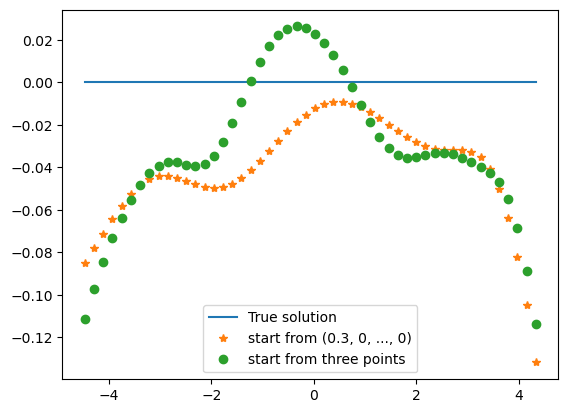

In [7]:
x_test = torch.linspace(-L, L, 200).unsqueeze(dim=1) * torch.ones(D)
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200), vmap(u_true)(x_test).detach().numpy())
plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - vmap(u_true)(x_test)).detach().numpy()[::4] / 20)
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - u1(x_test).squeeze() - 1).detach().numpy()[::4] / 20, "--")
plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - u3(x_test).squeeze() - 1).detach().numpy()[::4] / 20, "*")
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - u7(x_test).squeeze() - 1).detach().numpy()[::4] / 20, "s")
plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200)[::4], (vmap(u_true)(x_test) - u137(x_test).squeeze() -1).detach().numpy()[::4] / 20, "o")
# plt.ylim(-9, 22)
# plt.legend(["True solution", "start from (0.1, 0, ..., 0)", "start from (0.3, 0, ..., 0)", 
#            "start from (0.7, 0, ..., 0)", "start from three points"])
plt.legend(["True solution", "start from (0.3, 0, ..., 0)", "start from three points"])
# plt.savefig("20d_diag.png")
plt.show()


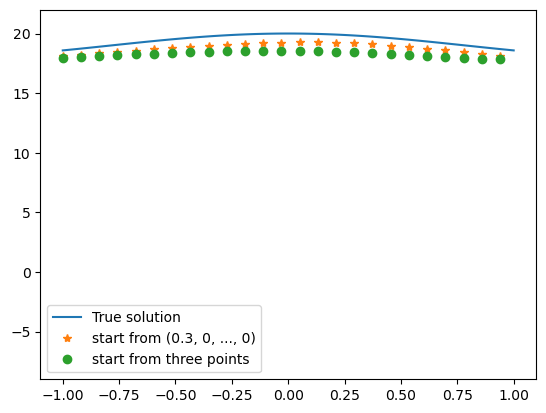

In [8]:
x_test = torch.linspace(-1, 1, 100).unsqueeze(dim=1) * (torch.tensor([1.] + [0.] * (D-1)))

plt.plot(np.linspace(-L, L, 100), vmap(u_true)(x_test).detach().numpy())
# plt.plot(np.linspace(-L, L, 100)[::4], u1(x_test).squeeze().detach().numpy()[::4], "--")
plt.plot(np.linspace(-L, L, 100)[::4], u3(x_test).squeeze().detach().numpy()[::4], "*")
# plt.plot(np.linspace(-L, L, 100)[::4], u7(x_test).squeeze().detach().numpy()[::4], "s")
plt.plot(np.linspace(-L, L, 100)[::4], u137(x_test).squeeze().detach().numpy()[::4], "o")

plt.ylim(-9, 22)
plt.legend(["True solution", "start from (0.3, 0, ..., 0)", "start from three points"])

plt.show()

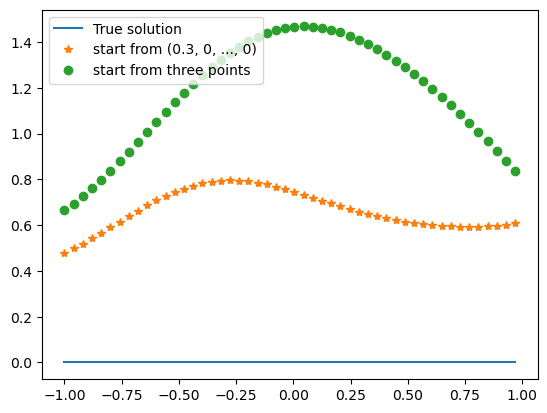

In [9]:
x_test = torch.linspace(-L, L, 200).unsqueeze(dim=1) * (torch.tensor([1.] + [0.] * (D-1)))
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200), vmap(u_true)(x_test).detach().numpy())
plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) - vmap(u_true)(x_test)).detach().numpy()[::4])
# plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) - u1(x_test).squeeze()).detach().numpy()[::4], "--")
plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) - u3(x_test).squeeze()).detach().numpy()[::4], "*")
# plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) - u7(x_test).squeeze()).detach().numpy()[::4], "s")
plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) - u137(x_test).squeeze()).detach().numpy()[::4], "o")
# plt.ylim(-9, 22)
plt.legend(["True solution", "start from (0.3, 0, ..., 0)", "start from three points"])
# plt.savefig("20d_diag.png")
plt.show()

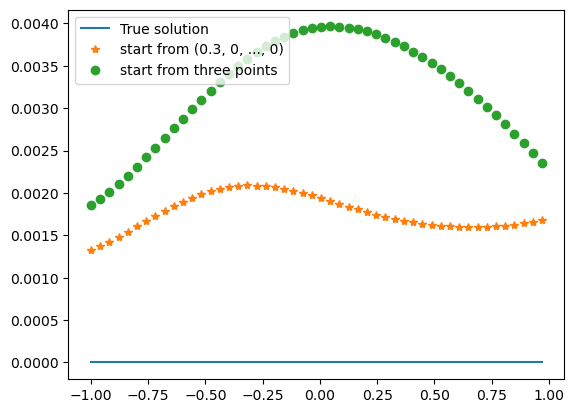

In [10]:
x_test = torch.linspace(-L, L, 200).unsqueeze(dim=1) * (torch.tensor([1.] + [0.] * (D-1)))
# plt.plot(np.linspace(-np.sqrt(D) * L, np.sqrt(D) * L, 200), vmap(u_true)(x_test).detach().numpy())
plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) / vmap(u_true)(x_test) - 1).detach().numpy()[::4] / 20)
# plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) / u1(x_test).squeeze() - 1).detach().numpy()[::4] / 20, "--")
plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) / u3(x_test).squeeze() - 1).detach().numpy()[::4] / 20, "*")
# plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) / u7(x_test).squeeze() - 1).detach().numpy()[::4] / 20, "s")
plt.plot(np.linspace(-L, L, 200)[::4], (vmap(u_true)(x_test) / u137(x_test).squeeze() - 1).detach().numpy()[::4] / 20, "o")
# plt.ylim(-9, 22)
plt.legend(["True solution", "start from (0.3, 0, ..., 0)", "start from three points"])
# plt.savefig("20d_diag.png")
plt.show()